# Pareto Analysis

- Based on 80/20 Rule
- Helps to identify a few vital categories from trival many
- For example 80% of the revenue comes from the 20% of the products. These 20% products are vital

**Data Requirement** : <br>One categorical column and One numerical column as a KPI

**Output** : 
- Identify important catagory from the catagorical columns contributing more revenue
- 80% revenue contributed by 20% catagory

**Application**<br>
Find out Important categories that drives our KPI
 
    

## Pareto Rule

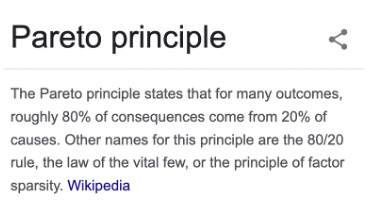

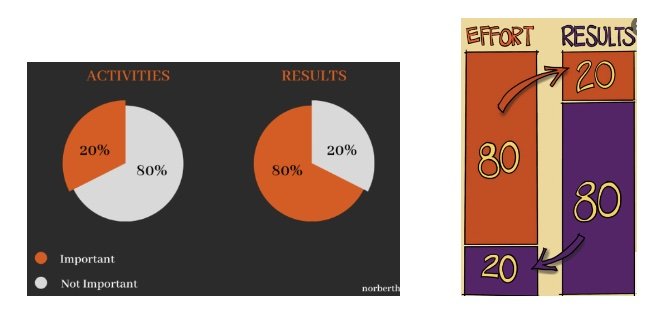

## Pareto Chart

- A Pareto Chart is a combination of a bar graph and a line graph.
- Visualize pareto analysis by pareto chart
- A Pareto chart has a Y axis on the left showing the value, and a Y axis on the right showing the **cumulative percent**, so u cannot check individual bar plot % from here.
- Below plot says only percentage (so u can check individual as well as cumulative % from here)
- Generally u check left y-axis for histogram and right y-axis for line chart.


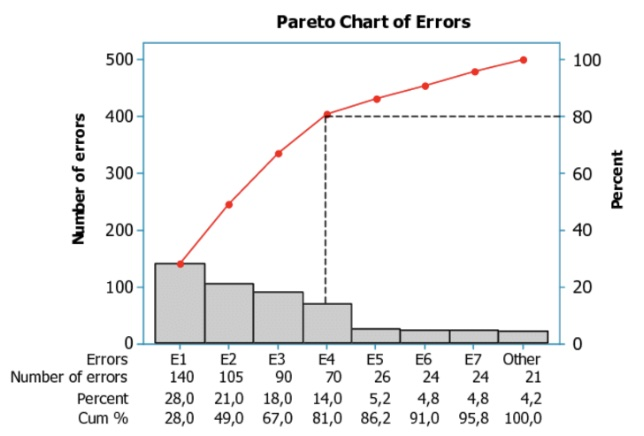

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Read Dataset

In [189]:
data = pd.read_csv('Google_playstore.csv')
data.shape

(10841, 14)

In [190]:
data.head(3)
# granularity- Each row belong to one mobile app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000


#### Check Data Type


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               10841 non-null  object 
 1   Category          10841 non-null  object 
 2   Rating            9367 non-null   float64
 3   Reviews           10841 non-null  object 
 4   Size              10841 non-null  object 
 5   Installs          10841 non-null  object 
 6   Type              10840 non-null  object 
 7   Price             10841 non-null  object 
 8   Content Rating    10840 non-null  object 
 9   Genres            10841 non-null  object 
 10  Last Updated      10841 non-null  object 
 11  Current Ver       10833 non-null  object 
 12  Android Ver       10838 non-null  object 
 13  installs_numeric  10841 non-null  int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


#### Describe Numerical Columns

In [192]:
data.describe()

,Rating,installs_numeric
count,9367.000000,1.084100e+04
mean,4.193338,1.546292e+07
std,0.537431,8.502557e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,5.000000e+06
max,19.000000,1.000000e+09


#### Describe Categorical Columns

In [193]:
data.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [194]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

## Which categories of apps are mostly installed?

In [195]:
# Method 1 
apps_install = data.groupby('Category')['installs_numeric'].sum().reset_index()
apps_install = apps_install.sort_values(by='installs_numeric',ascending=False)
print(type(apps_install))
apps_install

<class 'pandas.core.frame.DataFrame'>


,Category,installs_numeric
15,GAME,35086024415
7,COMMUNICATION,32647276251
26,PRODUCTIVITY,14176091369
28,SOCIAL,14069867902
30,TOOLS,11452771915
12,FAMILY,10258263505
25,PHOTOGRAPHY,10088247655
22,NEWS_AND_MAGAZINES,7496317760
31,TRAVEL_AND_LOCAL,6868887146
32,VIDEO_PLAYERS,6222002720


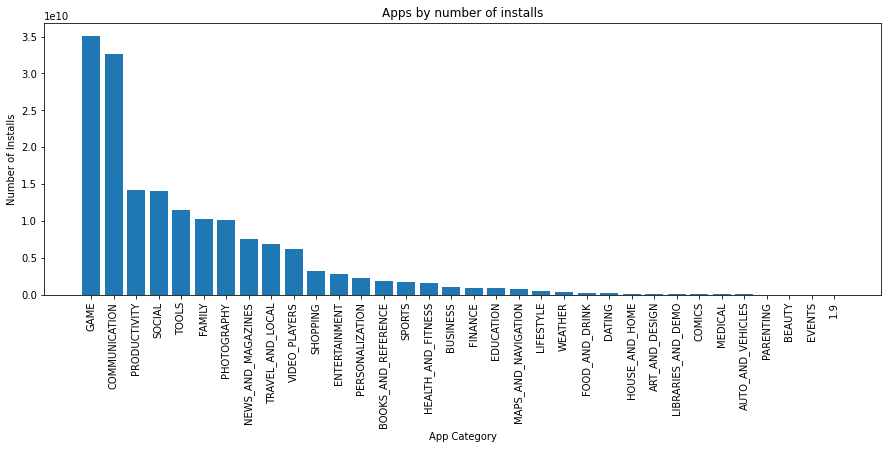

In [196]:
# Plot Bat Chart - categorical data with count

x=apps_install['Category']
y=apps_install['installs_numeric']


plt.figure(figsize=(15,5))
plt.bar(x, y)
plt.title('Apps by number of installs')
plt.xlabel('App Category')
plt.ylabel('Number of Installs')
plt.xticks(rotation=90);

In [197]:
install_numeric_sum = apps_install['installs_numeric'].sum()
print('Total number of installs ',install_numeric_sum)


Total number of installs  167633533487


In [198]:
df_pareto = apps_install

df_pareto['installs_cumsum'] = df_pareto['installs_numeric'].cumsum()
df_pareto.head()

,Category,installs_numeric,installs_cumsum
15,GAME,35086024415,35086024415
7,COMMUNICATION,32647276251,67733300666
26,PRODUCTIVITY,14176091369,81909392035
28,SOCIAL,14069867902,95979259937
30,TOOLS,11452771915,107432031852


The last entry for cumsum equals total number of installs  167633533487


In [199]:
df_pareto.tail()

,Category,installs_numeric,installs_cumsum
2,AUTO_AND_VEHICLES,53130211,167558742166
23,PARENTING,31521110,167590263276
3,BEAUTY,27197050,167617460326
11,EVENTS,15973161,167633433487
0,1.9,100000,167633533487


In [200]:
df_pareto['installs_numeric%'] = round(((df_pareto['installs_numeric']/install_numeric_sum)*100),2)

df_pareto['installs_cumsum %'] = round(((df_pareto['installs_cumsum']/install_numeric_sum)*100),2)
df_pareto.head(10)

,Category,installs_numeric,installs_cumsum,installs_numeric%,installs_cumsum %
15,GAME,35086024415,35086024415,20.93,20.93
7,COMMUNICATION,32647276251,67733300666,19.48,40.41
26,PRODUCTIVITY,14176091369,81909392035,8.46,48.86
28,SOCIAL,14069867902,95979259937,8.39,57.26
30,TOOLS,11452771915,107432031852,6.83,64.09
12,FAMILY,10258263505,117690295357,6.12,70.21
25,PHOTOGRAPHY,10088247655,127778543012,6.02,76.22
22,NEWS_AND_MAGAZINES,7496317760,135274860772,4.47,80.70
31,TRAVEL_AND_LOCAL,6868887146,142143747918,4.10,84.79
32,VIDEO_PLAYERS,6222002720,148365750638,3.71,88.51


In [201]:
df_pareto.tail()

,Category,installs_numeric,installs_cumsum,installs_numeric%,installs_cumsum %
2,AUTO_AND_VEHICLES,53130211,167558742166,0.03,99.96
23,PARENTING,31521110,167590263276,0.02,99.97
3,BEAUTY,27197050,167617460326,0.02,99.99
11,EVENTS,15973161,167633433487,0.01,100.00
0,1.9,100000,167633533487,0.00,100.00


In [202]:
df_pareto.columns

Index(['Category', 'installs_numeric', 'installs_cumsum', 'installs_numeric%',
       'installs_cumsum %'],
      dtype='object')

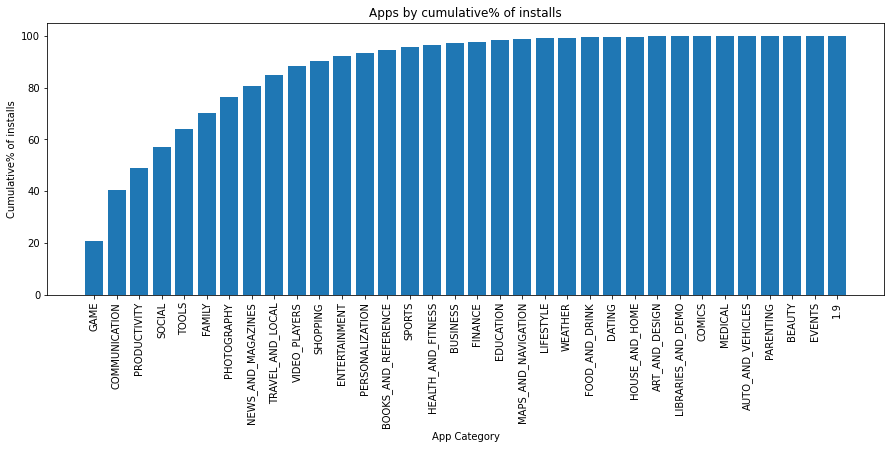

In [203]:
# Plot Bat Chart

x = df_pareto['Category']
y = df_pareto['installs_cumsum %']

plt.figure(figsize=(15,5))
plt.bar(x, y)
plt.title('Apps by cumulative% of installs')
plt.xlabel('App Category')
plt.ylabel('Cumulative% of installs')
plt.xticks(rotation=90);

**Extract categories which contribute 80% cumulative installs**


In [204]:
pareto_80 = df_pareto['Category'][df_pareto['installs_cumsum %'] <= 80]
pareto_80

15             GAME
7     COMMUNICATION
26     PRODUCTIVITY
28           SOCIAL
30            TOOLS
12           FAMILY
25      PHOTOGRAPHY
Name: Category, dtype: object

**Calculate % of these categories which give 80% of cumulative installs**

In [205]:
total_cat = len(df_pareto['Category'])
pareto_cat = len(pareto_80)

pareto_20 = round(((pareto_cat/total_cat)*100),2)
pareto_20

20.59

### Display Pareto Results

Major categories and their percentage


In [206]:
def pareto_results(df_pareto):
    major_cat = df_pareto['Category'][df_pareto['installs_cumsum %'] <= 80]
    major_cat_display = major_cat.to_list()  # as return dtype is array
    
    major_cat_count = len(major_cat)
    total_count = len(df_pareto)
    major_cat_prcnt = round(((major_cat_count/total_count)*100),2)
    
    summary_data_dict = {
        'Number of major_categories identified': major_cat_count,
        'Names of Major_categories': major_cat_display,
        'Total number of categories': total_count, 
        'Pareto_percentage_category': major_cat_prcnt,
            }
    return summary_data_dict
    

In [207]:
summary = pareto_results(df_pareto)
print(summary)

{'Number of major_categories identified': 7, 'Names of Major_categories': ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL', 'TOOLS', 'FAMILY', 'PHOTOGRAPHY'], 'Total number of categories': 34, 'Pareto_percentage_category': 20.59}


### Plot Pareto Chart

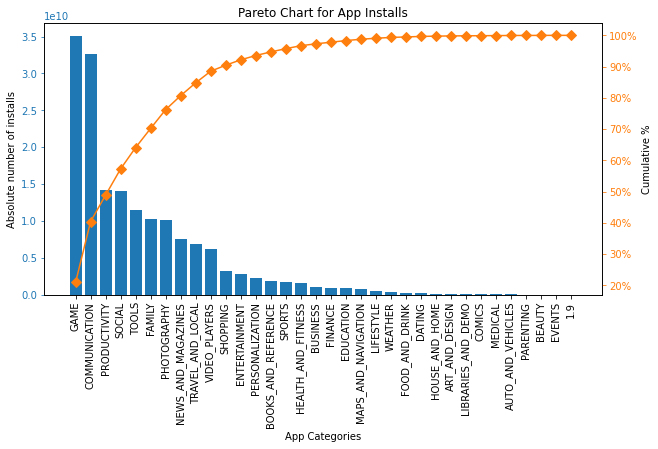

In [208]:
from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(df_pareto['Category'], df_pareto['installs_numeric'], color="C0")
ax1.set_xlabel('App Categories')
ax1.set_ylabel('Absolute number of installs')
ax1.set_title('Pareto Chart for App Installs')


ax2 = ax1.twinx()    #Create a twin Axes sharing the xaxis.

ax2.plot(df_pareto['Category'],df_pareto['installs_cumsum %'], color="C1",marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())  # to display y-axis as percentage
ax2.set_ylabel('Cumulative %')

ax1.tick_params(axis='x', labelrotation=90)
ax1.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
